In [2]:
#import cv2
import numpy as np
import os
import sys
import nibabel as nib
from utils.preprocessing.numpy import *
import matplotlib.pyplot as plt
import skimage.transform as sk

In [3]:
path = "/data/Datasets/stroke/ggarzon/regskip/"
path_ct = "/data/Datasets/stroke/ggarzon/regskip_ct/"

In [4]:
def window_image(image, window_center=60, window_width=120, mod="CT"):
    if mod=="DWI":
        window_center=3032
        window_width=6063
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    return window_image

In [5]:
def buscar(lista, s):
    for idx,i in enumerate(lista):
        if s==i[0]:
            return idx

In [36]:
lista_ct = [6,7,8,9,10,11,12,13]
lista_mri = [9,10,11,12,13,16,17,18]

In [46]:
imgnii_ct = nib.load(path+"7.0_Axial_CEREBRAL_5&10mm_20211129192537_8.nii.gz")
imgnii_dwi = nib.load(path+"Ax_DWI_B-1000_CEREBRAL-PERDIDA_NM_20211129221948_4.nii.gz")
imgnii_adc = nib.load(path+"ADC_(10_6mm2_s)_CEREBRAL-PERDIDA_NM_20211129221948_451.nii.gz")
af = imgnii_ct.affine
imgnii_ct = imgnii_ct.get_fdata()
imgnii_ct = window_image(imgnii_ct) #mod="DWI"
#imgnii = sk.rotate(imgnii[:,:,11,0], 90)
concat_s = np.zeros((256,256))
print(imgnii_ct.shape)
for s in range(imgnii_ct.shape[2]):
    if s>0 and s<17:
        #print(s)
        #plt.imshow(imgnii_ct[:,:,s], cmap="gray")
        #plt.show()
        brainout = sk.resize(imgnii_ct[:,:,s], (256,256))
        concat_s = np.dstack((concat_s, brainout))
#plt.imshow(imgnii, cmap="gray")
#plt.show()
#concat_s = np.dstack((concat_s, concat_s))
print(concat_s.shape)
concat_s = concat_s[:,:,1:]
ni_img = nib.Nifti1Image(concat_s, af)
nib.save(ni_img, path_ct+"ACV-002.nii.gz")

af1 = imgnii_dwi.affine
imgnii_dwi = imgnii_dwi.get_fdata()[:,:,:,0]
concat_s1 = np.zeros((256,256))
print(imgnii_dwi.shape)
for s in range(imgnii_dwi.shape[2]):
    if s>6 and s<23:
        #print(s)
        #plt.imshow(imgnii_ct[:,:,s], cmap="gray")
        #plt.show()
        brainout = sk.resize(imgnii_dwi[:,:,s], (256,256))
        concat_s1 = np.dstack((concat_s1, brainout))
#plt.imshow(imgnii, cmap="gray")
#plt.show()
#concat_s1 = np.dstack((concat_s1, concat_s1))
print(concat_s1.shape)
concat_s1 = concat_s1[:,:,1:]
ni_img1 = nib.Nifti1Image(concat_s1, af1)
nib.save(ni_img1, path_ct+"ACV-002-dwi.nii.gz")

af2 = imgnii_adc.affine
imgnii_adc = imgnii_adc.get_fdata()
concat_s2 = np.zeros((256,256))
print(imgnii_adc.shape)
nw = int(256/(imgnii_adc.shape[1]/imgnii_adc.shape[0]))
xi = int((nw-256)/2)
for s in range(imgnii_adc.shape[2]):
    if s>6 and s<23:
        #print(s)
        #plt.imshow(imgnii_ct[:,:,s], cmap="gray")
        #plt.show()
        brainout = sk.resize(imgnii_adc[:,:,s], (nw,256))
        brainout = brainout[xi:xi+256,:]
        concat_s2 = np.dstack((concat_s2, brainout))
#plt.imshow(imgnii, cmap="gray")
#plt.show()
#concat_s2 = np.dstack((concat_s2, concat_s2))
print(concat_s2.shape)
concat_s2 = concat_s2[:,:,1:]
ni_img2 = nib.Nifti1Image(concat_s2, af2)
nib.save(ni_img2, path_ct+"ACV-002-adc.nii.gz")

(512, 512, 21)
(256, 256, 17)
(256, 256, 26)
(256, 256, 17)
(568, 455, 26)
(256, 256, 17)


(256, 256, 16)
(256, 256)


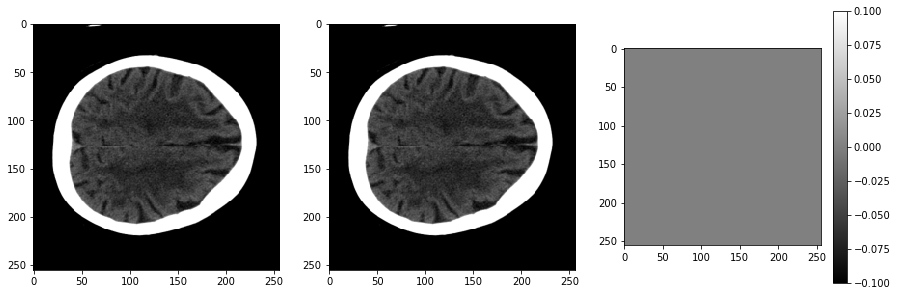

In [100]:
imgnii_ct = nib.load(path+"result2.nii")
imgnii_ct = imgnii_ct.get_fdata()
imgnii_dwi = nib.load(path+"7.0_Axial_CEREBRAL_5&10mm_20211129192537_8.nii.gz")
imgnii_dwi = imgnii_dwi.get_fdata()
imgnii_dwi = window_image(imgnii_dwi)
idx = 13
imgnii_dwi = sk.resize(imgnii_dwi[:,:,idx], (256,256))
print(imgnii_ct.shape)
print(imgnii_dwi.shape)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#fig.figsize(10,3)
axs[0].imshow(imgnii_ct[:,:,idx-1], cmap="gray")
axs[1].imshow(imgnii_dwi[:,:], cmap="gray")
i = axs[2].imshow(imgnii_ct[:,:,idx-1]-imgnii_dwi[:,:], cmap="gray")
fig.colorbar(i)
plt.show()

In [104]:
imgnii_dwi = nib.load(path+"7.0_Axial_CEREBRAL_5&10mm_20211129192537_8.nii.gz")
af = imgnii_dwi.affine
imgnii_dwi = imgnii_dwi.get_fdata()
concat_s = np.zeros((256,256))
print(imgnii_dwi.shape)
for s in range(imgnii_dwi.shape[2]):
    concat_s = np.dstack((concat_s, sk.resize(imgnii_dwi[:,:,s], (256,256))))
    #imgnii_dwi = sk.resize(imgnii_dwi[:,:,s], (256,256))
concat_s = concat_s[:,:,1:]
print(concat_s.shape)
ni_img2 = nib.Nifti1Image(concat_s, af)
nib.save(ni_img2, path+"7.0_Axial_CEREBRAL_256x256.nii.gz")

(512, 512, 21)
(256, 256, 21)
